## dataset 목록
- tf.keras.dataset import keras
    - boston_housing
    - cifar10
    - cifar100
    - fashion_mnist
    - mnist
    - imdb
    - reuters

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np

from tensorflow.keras import datasets

mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Image Dataset 들여다보기
- 단 시각화시에는 2차원이여야함

(28, 28)


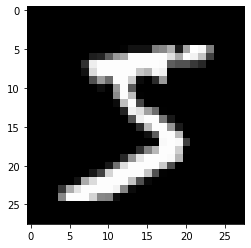

In [7]:
image = train_x[0]
print(image.shape)
plt.imshow(image, 'gray')

## Channel 축소, 증가
- 데이터 차원수 늘리기(numpy)
- (1) numpy 함수 : np.expand_dims
- (2) tensorflow 함수 : tf.expand_dims
- 0이면 맨 앞에 차원수 늘림 / -1이면 맨 뒤에 차원수 늘림
- (3) newaxis 사용방법
- (4) reshape 사용방법
- 축소 방법 : np.squeeze

In [11]:

# numpy 방법
expanded_data = np.expand_dims(train_x, 0) # 0이면 맨 앞에 차원수 늘리는 것)
print(expanded_data.shape)

# Tesnorflow 방법으로 늘리는 법
tf_expanded_data = tf.expand_dims(train_x, -1) # -1이면 맨 뒤에 차원수 늘리는 것
print(tf_expanded_data.shape)

# Tensorflow 방법 2
print(train_x[..., tf.newaxis].shape)

# reshape 방법
print(train_x.reshape([1,28,28,60000]).shape)

(1, 60000, 28, 28)
(60000, 28, 28, 1)
(60000, 28, 28, 1)
(1, 28, 28, 60000)


(60000, 28, 28, 1)
(28, 28, 1)


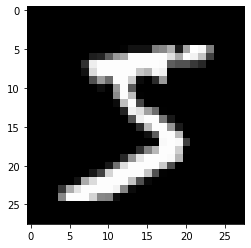

In [16]:
# 3차원으로 이미지 show 시 오류 뜸
expanded_image = tf_expanded_data
print(expanded_image.shape)
print(expanded_image[0].shape)

# np.squeeze 함수로 이미지 차원 축소
disp = np.squeeze(expanded_image[0])
plt.imshow(disp, 'gray')

## one hot encoding 
- Classification 이니까 펼치는 것
- 1, 2, 3, 4 이렇게가면 linear 하게 인식 할 수 있음
- tensorflow.keras.utils.to_categorical

In [20]:
from tensorflow.keras.utils import to_categorical

# 10개 중에서 5를 1로 변경 (6번째임)
print(to_categorical(1,10)) # y, num_category
print(to_categorical(3,10))

print('--onehot encoding--')
label = train_y[0]
print(label)
label_onehot = to_categorical(label, 10)
print(label_onehot)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
onehot encoding
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
